In [2]:
import pickle

In [3]:
with open("../trade_log/synthetic_RSI (14)/RSI (14)_-0.03_0.1.pkl", "rb") as f:
    data = pickle.load(f)

In [45]:
data.keys()

dict_keys(['date', 'return', 'for_stoploss', 'trade_log', 'trajectory', 'param'])

In [4]:
import numpy as np
import pandas as pd

state_data = pd.read_csv("../tick_data/sp500.csv")
action_array = np.zeros((state_data.shape[0], 4))
action = data["trade_log"]
action_types = ["long", "sell", "buytocover", "short"]

for period in action:
    for idx, name in enumerate(action_types):
        if period[name] is not None:
            action_array[period[name], idx] = 1
        else:
            continue


In [5]:
stop_loss_array = np.zeros((state_data.shape[0]))
stop_loss_array[state_data.shape[0] - len(data["for_stoploss"]): ] = data["for_stoploss"]

In [66]:
sum_action = np.sum(action_array, axis=1)

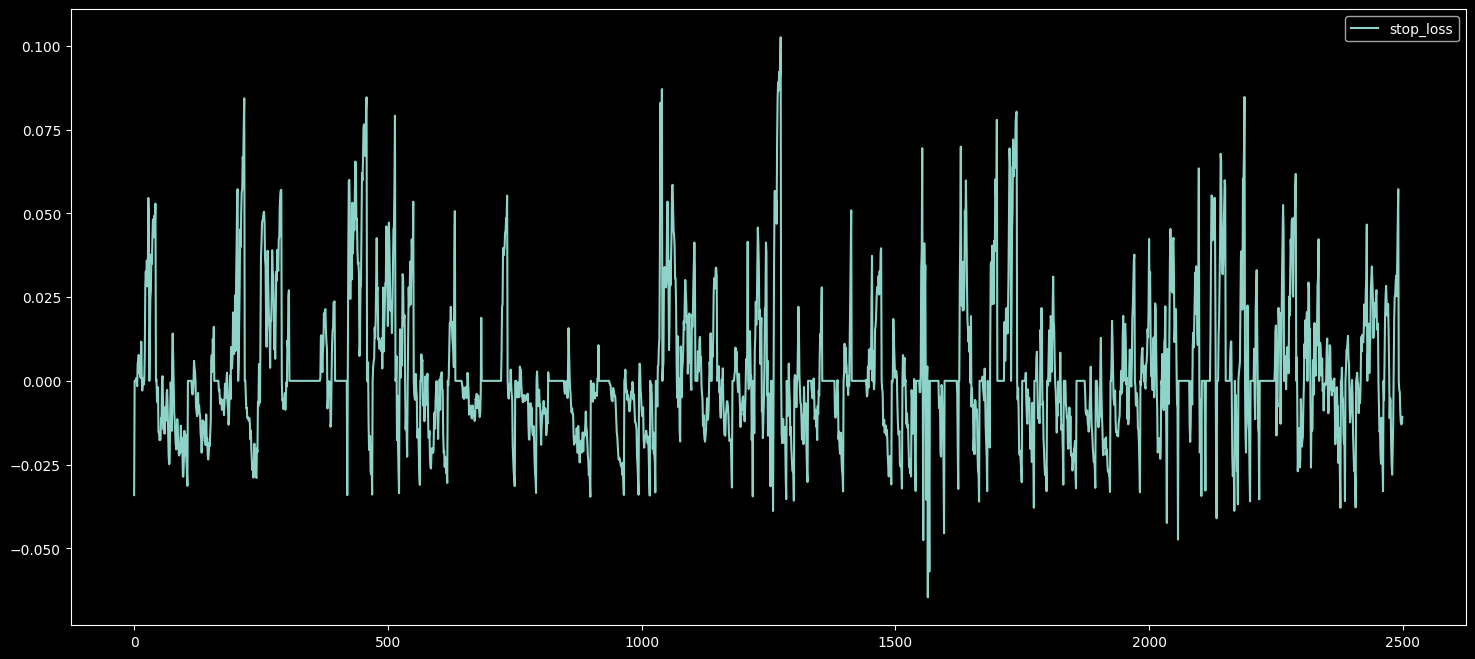

In [6]:
import matplotlib.pyplot as plt
l, r = 1000, 3500
plt.figure(figsize=(18, 8))
plt.plot(stop_loss_array[l:r], label="stop_loss")
plt.legend()
plt.show()

In [58]:
action_array[:, 0]

array([0., 0., 0., ..., 1., 0., 0.])